In [1]:
import numpy as snp
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_excel('ANZ.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.shape

(12043, 23)

In [4]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

<AxesSubplot:>

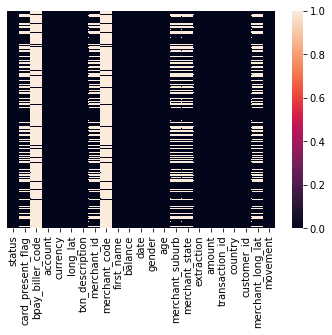

In [5]:
sns.heatmap(data.isnull(),yticklabels=False)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [7]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [8]:
data['account'].nunique()

100

In [9]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [10]:
data.shape

(12043, 23)

In [11]:
data['customer_id'].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [12]:
# adding three columns: year, month, and day of the transaction to make the segmentation by date easy.
data['day']= data['date'].dt.day_name()
data['month'] = data['date'].dt.month_name()
data['year'] = data['date'].dt.year

In [13]:
# now let's check the unique values of our new columns
data.year.value_counts()

2018    12043
Name: year, dtype: int64

In [14]:
# because all the transactions are from 2018, I will drop the year columns
data.drop(['year'], axis = 1 , inplace = True)

In [15]:
# it looks like transactions happened only in August, September, and October
data.month.value_counts()

October      4087
September    4013
August       3943
Name: month, dtype: int64

In [16]:
# unique values of txn_description (mode of transaction)
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [17]:
# finally let's check the distribution of the dataset by gender
data.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

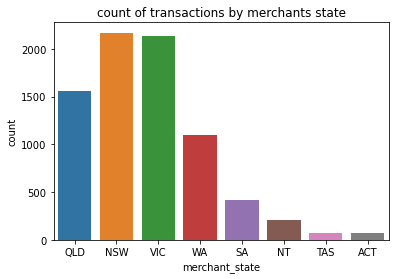

In [18]:
sns.countplot(x='merchant_state',data=data)
plt.title('count of transactions by merchants state');

<AxesSubplot:xlabel='txn_description', ylabel='count'>

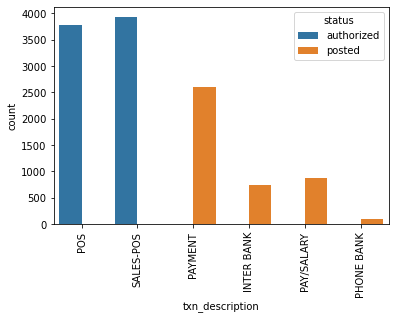

In [19]:
plt.xticks(rotation=90)
sns.countplot(x="txn_description",hue="status",data=data)

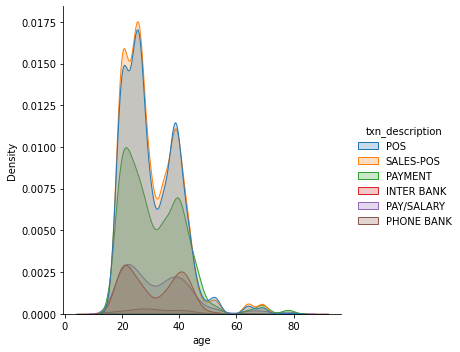

In [20]:
sns.displot(data, x="age", hue="txn_description", kind="kde", fill=True)

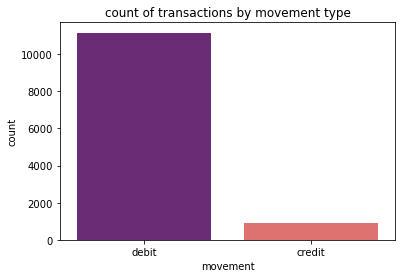

In [21]:
sns.countplot(x = 'movement', data = data, palette = 'magma')
plt.title('count of transactions by movement type');

In [22]:
data.drop(['transaction_id', 'account', 'first_name', 'long_lat','merchant_id','merchant_suburb', 'merchant_long_lat'], axis = 1 , inplace = True)
data.head()

,status,card_present_flag,bpay_biller_code,currency,txn_description,merchant_code,balance,date,gender,age,merchant_state,extraction,amount,country,customer_id,movement,day,month
0,authorized,1.0,NaN,AUD,POS,NaN,35.39,2018-08-01,F,26,QLD,2018-08-01T01:01:15.000+0000,16.25,Australia,CUS-2487424745,debit,Wednesday,August
1,authorized,0.0,NaN,AUD,SALES-POS,NaN,21.20,2018-08-01,F,26,NSW,2018-08-01T01:13:45.000+0000,14.19,Australia,CUS-2487424745,debit,Wednesday,August
2,authorized,1.0,NaN,AUD,POS,NaN,5.71,2018-08-01,M,38,NSW,2018-08-01T01:26:15.000+0000,6.42,Australia,CUS-2142601169,debit,Wednesday,August
3,authorized,1.0,NaN,AUD,SALES-POS,NaN,2117.22,2018-08-01,F,40,QLD,2018-08-01T01:38:45.000+0000,40.90,Australia,CUS-1614226872,debit,Wednesday,August
4,authorized,1.0,NaN,AUD,SALES-POS,NaN,17.95,2018-08-01,F,26,QLD,2018-08-01T01:51:15.000+0000,3.25,Australia,CUS-2487424745,debit,Wednesday,August


Text(0.5, 1.0, 'count of transactions by day of week')

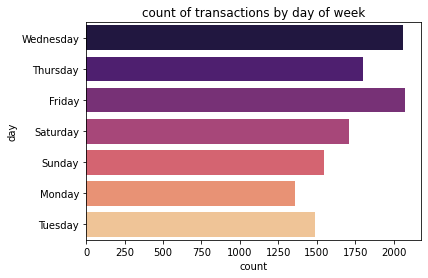

In [23]:
sns.countplot(y = 'day', data = data, palette = 'magma')
plt.title('count of transactions by day of week')

Text(0.5, 1.0, 'count of transactions by month')

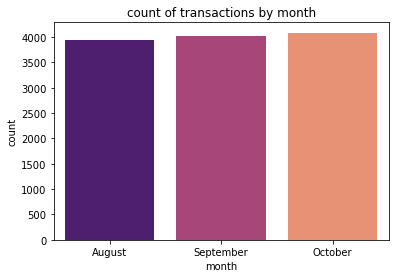

In [24]:
sns.countplot(x = 'month', data = data, palette = 'magma')
plt.title('count of transactions by month')

Text(0.5, 1.0, 'Gender wise transactions by month')

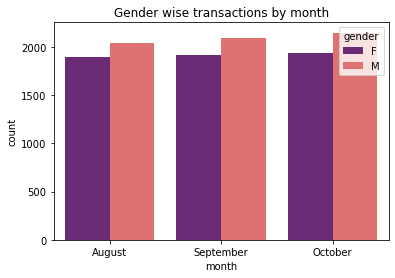

In [25]:
sns.countplot(x='month',data=data,hue='gender' ,palette = 'magma')
plt.title('Gender wise transactions by month')

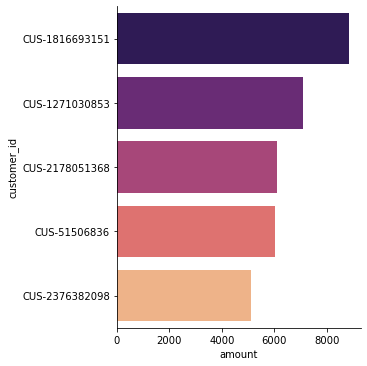

In [26]:
# customers of the 10 highest transaction amounts
data1 = data.loc[data.amount.sort_values(ascending =False)[:10].index]
sns.catplot(y="customer_id", x="amount", kind="bar", data=data1 , palette = 'magma');

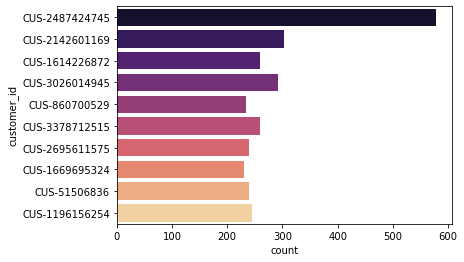

In [27]:
# cutomers with the highest number of transactions
data2 = data.loc[data['customer_id'].isin(data.customer_id.value_counts()[:10].index)]
sns.countplot(y = 'customer_id', data=data2 , palette = 'magma');

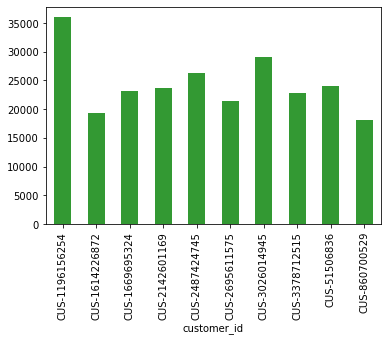

In [28]:
# total transactions amounts for the customers with highest number of transactions
data2.groupby('customer_id')['amount'].sum().plot.bar(color = 'green', alpha = 0.8);

In [29]:
data.corr()

,card_present_flag,merchant_code,balance,age,amount
card_present_flag,1.000000,NaN,0.005925,-0.008405,-0.002074
merchant_code,NaN,NaN,NaN,NaN,NaN
balance,0.005925,NaN,1.000000,0.199329,0.059178
age,-0.008405,NaN,0.199329,1.000000,0.029980
amount,-0.002074,NaN,0.059178,0.029980,1.000000


<AxesSubplot:>

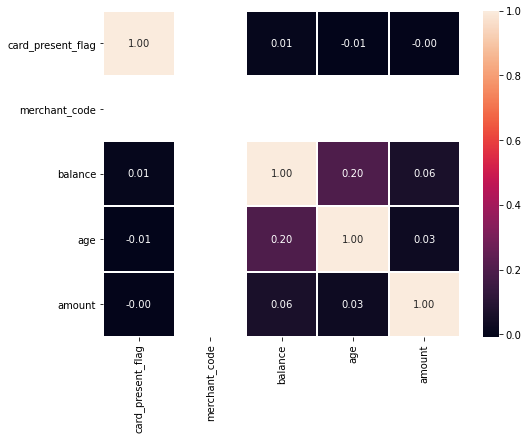

In [30]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), annot= True, linewidth= 1, fmt= '.2f', ax=ax)

In [31]:
salary = data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
salary.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [32]:
salaries = []

for customer_id in data["customer_id"]:
    salaries.append(int(salary.loc[customer_id]["amount"]))
    
data["annual_salary"] = salaries

In [34]:
data4 = data.groupby("customer_id").mean()
data4.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


## Linear regression

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.tree import DecisionTreeRegressor

In [43]:
N_train = int(len(data4)*0.8)
X_train = data4.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = data4["annual_salary"].iloc[:N_train]
X_test = data4.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = data4["annual_salary"].iloc[N_train:]

In [44]:
linear_reg = LinearRegression()

In [45]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.23295376366257825

In [46]:
linear_reg.predict(X_test)

array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [47]:
linear_reg.score(X_test, Y_test)

-0.3169423498074737

### Decision Tree - Classification and Regression

In [50]:
data5 = data[["txn_description", "gender", "age", "merchant_state", "movement"]]
data5

,txn_description,gender,age,merchant_state,movement
0,POS,F,26,QLD,debit
1,SALES-POS,F,26,NSW,debit
2,POS,M,38,NSW,debit
3,SALES-POS,F,40,QLD,debit
4,SALES-POS,F,26,QLD,debit
...,...,...,...,...,...
12038,POS,F,30,VIC,debit
12039,SALES-POS,M,20,NSW,debit
12040,POS,M,28,NSW,debit
12041,SALES-POS,M,69,VIC,debit


In [49]:
pd.get_dummies(data5).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [56]:
N_train = int(len(data4)*0.8)
X_train = pd.get_dummies(data5).iloc[:N_train]
Y_train = data4["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(data5).iloc[N_train:]
Y_test = data4["annual_salary"].iloc[N_train:]

### Classification

In [58]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [59]:
decision_tree_class = DecisionTreeClassifier()

In [61]:
decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)

0.8625

In [62]:
decision_tree_class.predict(X_test)

array([5103, 1757, 2887, ..., 1880,  596, 3071], dtype=int64)

### Regression

In [65]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.8231187369345798

In [67]:
decision_tree_reg.predict(X_test)

array([5103., 3328., 5861., ..., 1880.,  596., 3578.])